In [ ]:
from kandinsky.utils import set_hf_token
from PIL import Image

# NOTE: specify your HF token or download all the required checkpoints in advance;
# T2I / I2I require FLUX.1-dev VAE, which is a closed repo
HF_TOKEN = None
set_hf_token(HF_TOKEN)

/home/jovyan/.mlspace/envs/mvvaulin_qwen_inpaint/lib/python3.11/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


FlashAttention 2 is found


[W1114 18:55:47.566357113 OperatorEntry.cpp:218] Warning: Warning only once for all operators,  other operators may also be overridden.
  Overriding a previously registered kernel for the same operator and the same dispatch key
  operator: aten::_addmm_activation(Tensor self, Tensor mat1, Tensor mat2, *, Scalar beta=1, Scalar alpha=1, bool use_gelu=False) -> Tensor
    registered at /pytorch/build/aten/src/ATen/RegisterSchema.cpp:6
  dispatch key: AutocastCPU
  previous kernel: registered at /pytorch/aten/src/ATen/autocast_mode.cpp:327
       new kernel: registered at /opt/workspace/ipex-cpu-dev/csrc/cpu/autocast/autocast_mode.cpp:112 (function operator())


In [ ]:
from kandinsky import get_T2I_pipeline
pipe = get_T2I_pipeline(
    resolution=1024, offload=True,
    device_map={"dit": "cuda:0", "vae": "cuda:0", "text_embedder": "cuda:0"},
)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
out = pipe("a cat in a red hat. white text 'sweet' writen on a hat",)

100%|██████████| 50/50 [00:46<00:00,  1.07it/s]


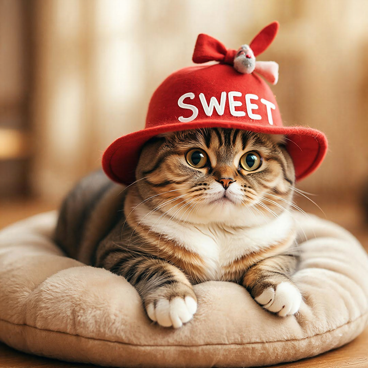

In [4]:
out[0].resize((368,368))